In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lendo aposentadorias de anos anteriores a 2021
cols = ['Nome','CPF','Matrícula do Servidor','Nome do órgão','Sigla do órgão','Código do órgão superior','Cargo', 'Classe', 'Padrão', 
        'Referência', 'Nível' ,'Tipo de Aposentadoria','Fundamentação da inatividade','Nome Diploma Legal',
        'Data publicação do Diploma Legal','Ocorrência de ingresso no serviço público','Data de ocorrência de ingresso no serviço público ','Rendimento_liq']
anos_ap = ['2019', '2020', '2021']
df_aposentados = []
for ano in anos_ap:
    dir =  r'./dataset/Datasets/Aposentados{}'.format(ano)
    files = glob.glob(dir + "/*.csv")

    df = []
    for j in range(len(files)):
        df.append(pd.read_csv(files[j], encoding='Latin1', sep=';', names=cols, index_col=False, on_bad_lines='skip'))

    df_aposentados.append(pd.concat(df))

# df_ap = pd.concat(df_aposentados)

In [3]:
def MesAnoAposentadoria(df_aps):
    #Armazenando o mes e ano do início do abono
    dates = []
    #colocando como string para separar os valores de mês e ano
    for date in df_aps['Data publicação do Diploma Legal']:
        dates.append(str(date))
    mes = []
    ano = []
    #separando e armazenando como inteiro
    for i in range(len(dates)):
        aux = dates[i][-6:-4]
        mes.append(int(aux))
        aux = dates[i][-4:]
        ano.append(int(aux))
    return mes,ano

In [4]:
for i in range(len(df_aposentados)):
    df_aposentados[i]['Mes'], df_aposentados[i]['Ano'] = MesAnoAposentadoria(df_aposentados[i])

In [5]:
def rendimento_liq_para_float(df_apos):
  df_apos['Rendimento_liq'] = df_apos['Rendimento_liq'].str.replace('.', '', regex=False)
  df_apos['Rendimento_liq'] = df_apos['Rendimento_liq'].str.replace(',', '.').astype(float)

In [6]:
for i in range(len(df_aposentados)):
  rendimento_liq_para_float(df_aposentados[i])

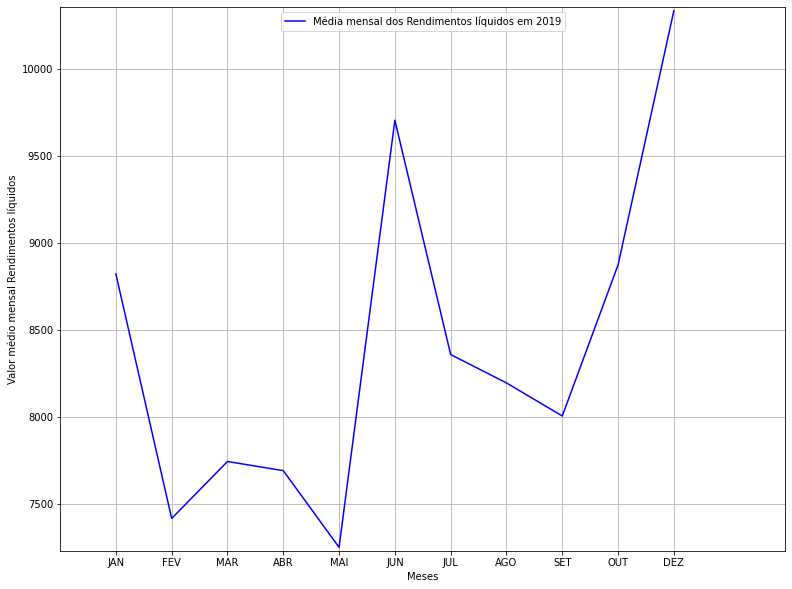

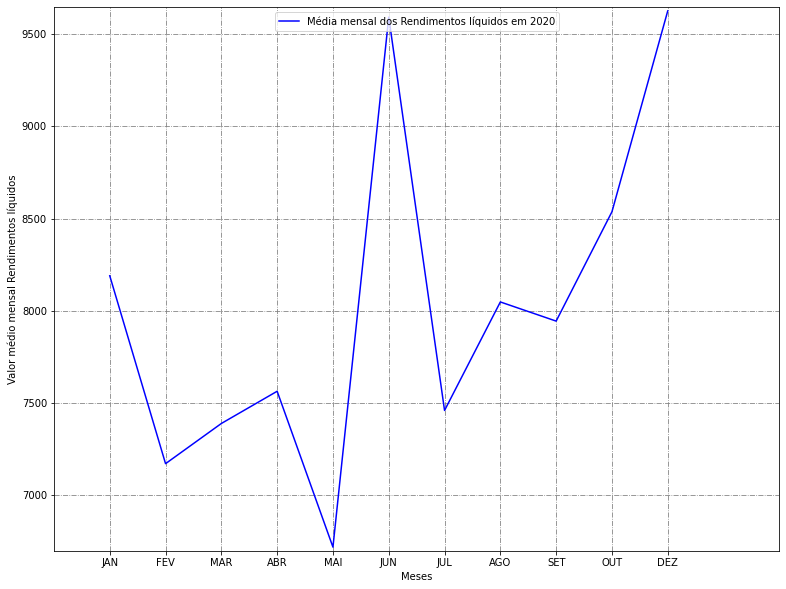

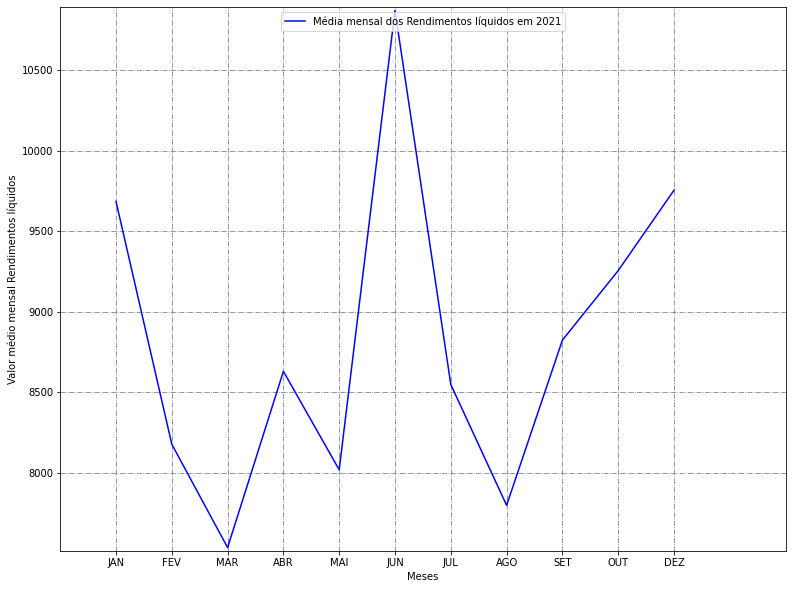

In [7]:
#Média dos anos anteriores a 2021 - APOSENTADOS
def mediaAposentados(df_apos, index):
    meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'DEZ']
    meses_medias = list(df_apos.groupby('Mes').Rendimento_liq.mean())

    fig = plt.figure(figsize=(13, 10))
    plt.plot(meses, meses_medias, color = 'blue')
    plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
    plt.xlim(-1, 12)

    plt.rc('grid', linestyle="-.", color='gray')
    plt.grid(True)

    plt.xlabel('Meses')
    plt.ylabel('Valor médio mensal Rendimentos líquidos')
    plt.legend(['Média mensal dos Rendimentos líquidos em '+anos_ap[index]], loc=9)
    plt.show()
    fig_name = 'valor médio mensal dos Rendimentos líquidos em {}'.format(anos_ap[i])
    fig.savefig(fig_name+'.png', format='png', dpi=100)
    return meses_medias

mediasAposentados = []
for i in range(len(df_aposentados)):
    mediasAposentados.append(mediaAposentados(df_aposentados[i], i))

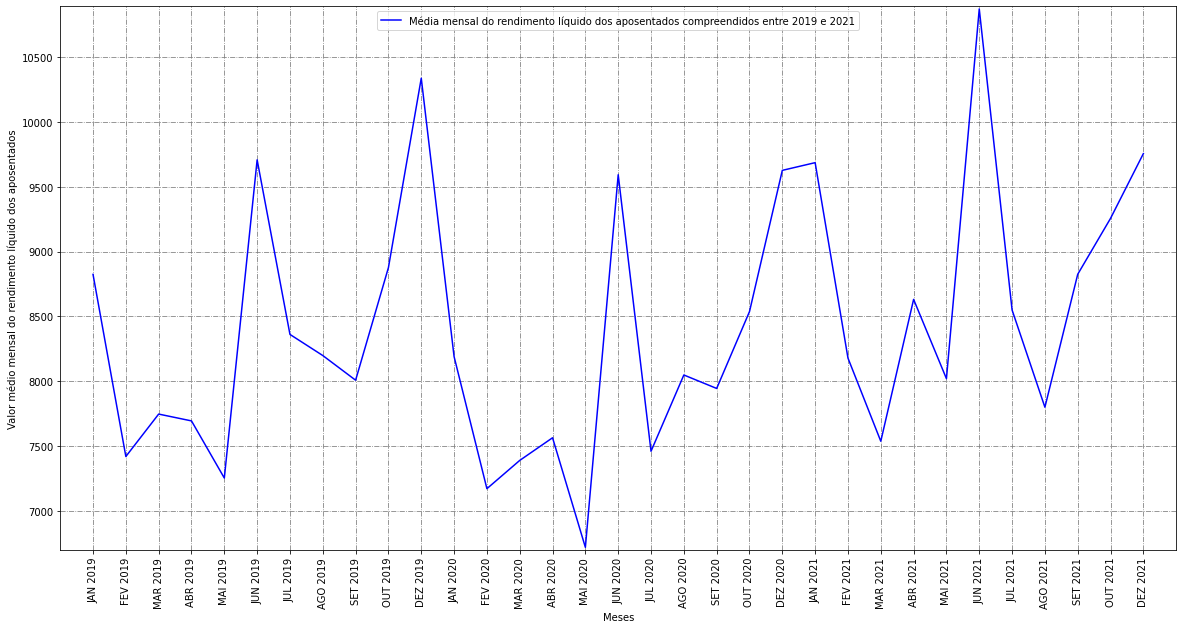

In [8]:
#Valor mensal de abonos em 2021
meses = []
for year in anos_ap:
    months_table = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'DEZ']
    for month in months_table:
        meses.append(f'{month} {year}')

meses_medias = []
for df_ap_ in df_aposentados:
    meses_medias += list(df_ap_.groupby('Mes').Rendimento_liq.mean())

fig = plt.figure(figsize=(20, 10))
plt.plot(meses, meses_medias, color = 'blue')
plt.xticks(rotation=90)
plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
plt.xlim(-1, len(meses))

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Valor médio mensal do rendimento líquido dos aposentados')
plt.legend(['Média mensal do rendimento líquido dos aposentados compreendidos entre 2019 e 2021'], loc=9)
plt.show()

fig.savefig('Média mensal do rendimento líquido dos aposentados compreendidos entre 2019 e 2021.png', format='png', dpi=100)

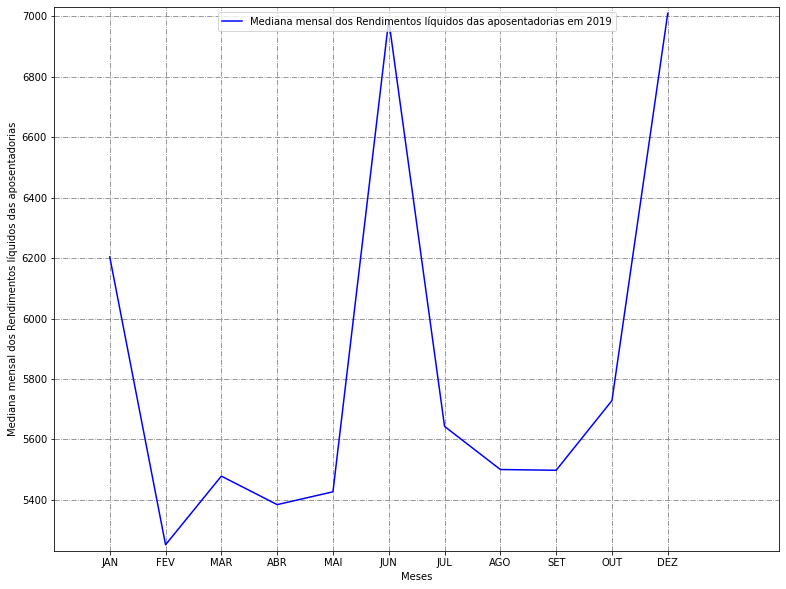

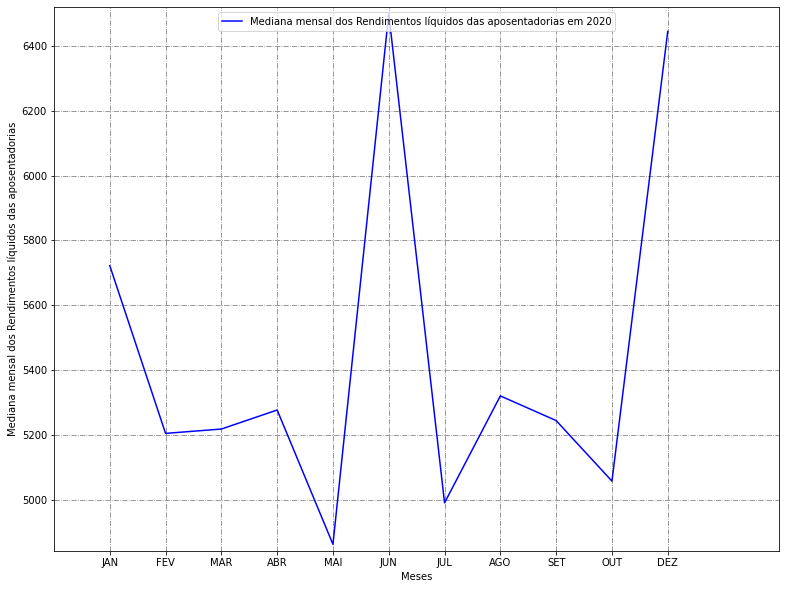

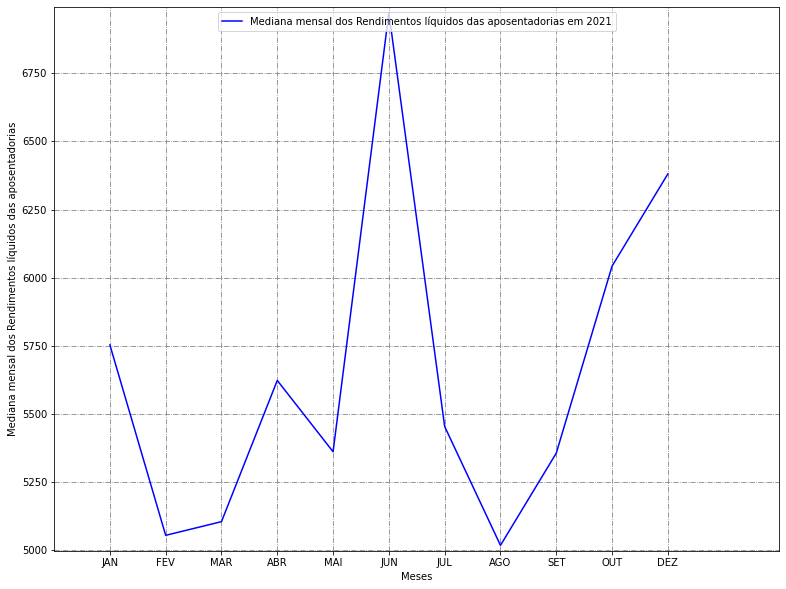

In [9]:
def medianaAposentados(df_aps, index):
  meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'DEZ']
  medianas = list(df_aps.groupby('Mes').Rendimento_liq.median())

  fig = plt.figure(figsize=(13, 10))
  plt.plot(meses, medianas, color = 'blue')
  plt.ylim(min(medianas) - 20, max(medianas) + 20)
  plt.xlim(-1,12)

  plt.rc('grid', linestyle="-.", color='gray')
  plt.grid(True)

  plt.xlabel('Meses')
  plt.ylabel('Mediana mensal dos Rendimentos líquidos das aposentadorias')
  plt.legend([f'Mediana mensal dos Rendimentos líquidos das aposentadorias em {anos_ap[index]}'], loc=9)
  plt.show()

  fig.savefig(f'Mediana mensal dos rendimentos líquidos em {anos_ap[index]}.png', format='png', dpi=100)

medianasAposentadorias = []
for i in range(len(df_aposentados)):
    medianasAposentadorias.append(medianaAposentados(df_aposentados[i], i))

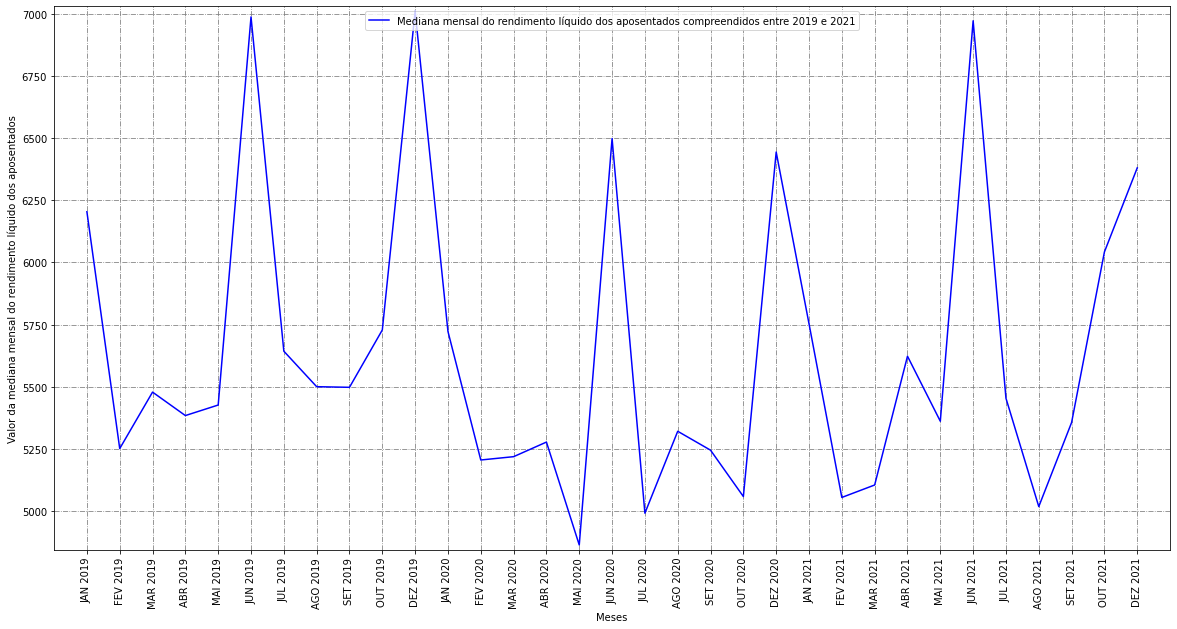

In [10]:
#Valor mensal de abonos em 2021
meses_medias = []
for df_ap_ in df_aposentados:
    meses_medias += list(df_ap_.groupby('Mes').Rendimento_liq.median())

fig = plt.figure(figsize=(20, 10))
plt.plot(meses, meses_medias, color = 'blue')
plt.xticks(rotation=90)
plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
plt.xlim(-1, len(meses))

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Valor da mediana mensal do rendimento líquido dos aposentados')
plt.legend(['Mediana mensal do rendimento líquido dos aposentados compreendidos entre 2019 e 2021'], loc=9)
plt.show()

fig.savefig('Mediana mensal do rendimento líquido dos aposentados compreendidos entre 2019 e 2021.png', format='png', dpi=100)

In [11]:
#Lendo abono de anos anteriores a 2021
cols = ['Nome','CPF','Descr_empr','Escolaidade','org_atuacao','UF_da_UPAG','uni._organ','UF',
'Cidade', 'Situacao', 'Anos_servico','meses_servico','Inicio_Abono','VAL']
anos_ab = ['2017', '2018', '2019', '2020', '2021']
df_abonos = []
for ano in anos_ab:
    dir =  r'./dataset/Datasets/Abono{}'.format(ano)
    files = glob.glob(dir + "/*.csv")
    df = []
    dfs = []
    for file in files:
        df.append(pd.read_csv(file, encoding='Latin1',sep=';', index_col=False, on_bad_lines = 'skip'))
    dfs = pd.concat(df)
    dfs = dfs[dfs['Nome'] != 'Nome']
    df_abonos.append(dfs)

In [12]:
names = {
    'Nome': 'Nome',
    'CPF': 'CPF',
    'Descrição do cargo emprego': 'Descr_empr',
    'Nível de Escolaridade': 'Escolaridade',
    'Denominação do órgão de atuação': 'org_atuacao',
    'UF da UPAG de vinculação': 'UF_da_UPAG',
    'Denominação unidade organizacional': 'uni._organ',
    'UF da Residência': 'UF',
    'Cidade da residência': 'Cidade',
    'Situação servidor': 'Situacao',
    'Quantidade de anos no Serviço público': 'Anos_servico',
    'Quantidade de meses no Serviço público': 'meses_servico',
    'Ano/Mês inicial do abono de permanência': 'Inicio_Abono',
    'Val': 'VAL'
}
for df_abono in df_abonos:
    df_abono.rename(columns=names, inplace=True)

In [13]:
#Depois, se quiser, colocar essa função pra funcionar com 2021. Deixei assim por dúvidas se iria funcionar ou não
def MesAno(df_ab):
    #Armazenando o mes e ano do início do abono
    dates = []
    #colocando como string para separar os valores de mês e ano
    for date in df_ab['Inicio_Abono']:
        dates.append(str(date))
    mes = []
    ano = []
    #separando e armazenando como inteiro
    for i in range(len(dates)):
        aux = dates[i][4] + dates[i][5]
        mes.append(int(aux))
        aux = dates[i][0] + dates[i][1] + dates[i][2] + dates[i][3]
        ano.append(int(aux))
    return mes,ano

In [14]:
#Tomando o mes e ano, do mesmo modo feito para 2021
for i in range(len(df_abonos)):
    df_abonos[i]['Mes'], df_abonos[i]['Ano'] = MesAno(df_abonos[i])

In [15]:
df_abono['meses_servico'] = df_abono['meses_servico'].astype(int)
df_abono['Anos_servico'] = df_abono['Anos_servico'].astype(int)

print(df_abono['meses_servico'].head())
print(df_abono['Anos_servico'].head())

0    7
1    6
2    5
3    2
4    2
Name: meses_servico, dtype: int32
0    42
1    42
2    42
3    42
4    42
Name: Anos_servico, dtype: int32


In [16]:
#Fazendo o mesmo para os anos anteriores a 2021
for i in range(len(df_abonos)):
    df_abonos[i]['VAL'] = df_abonos[i]['VAL'].str.replace(',', '.').astype(float)

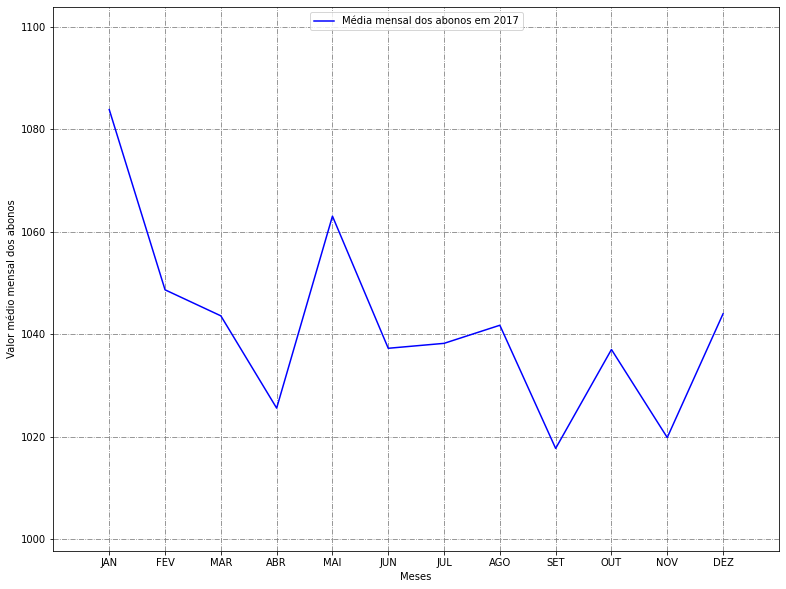

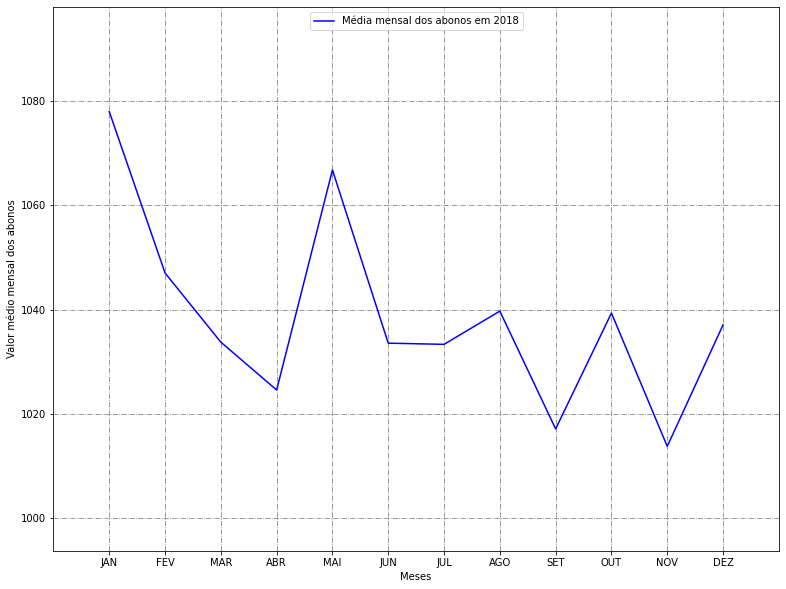

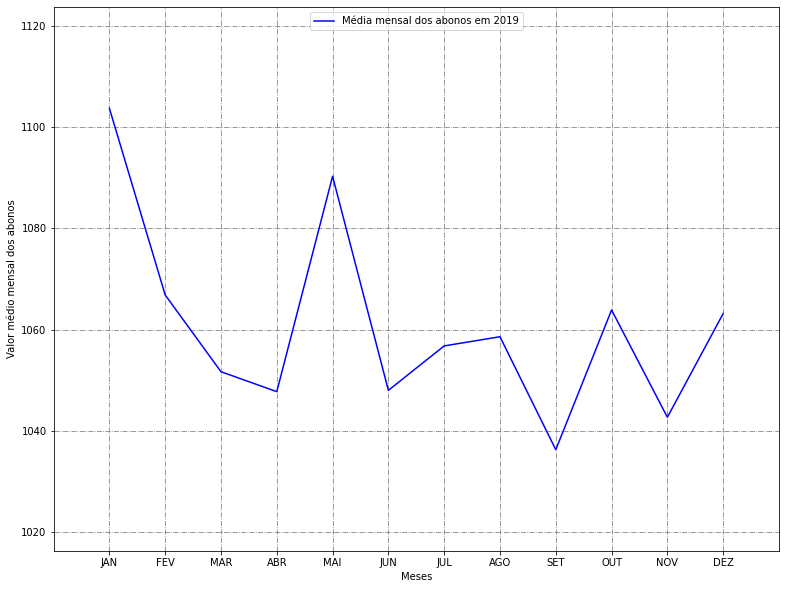

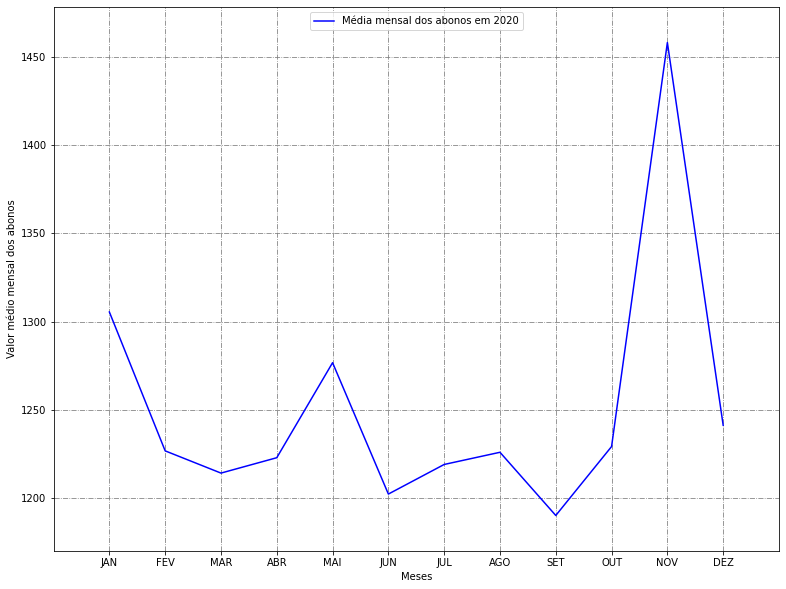

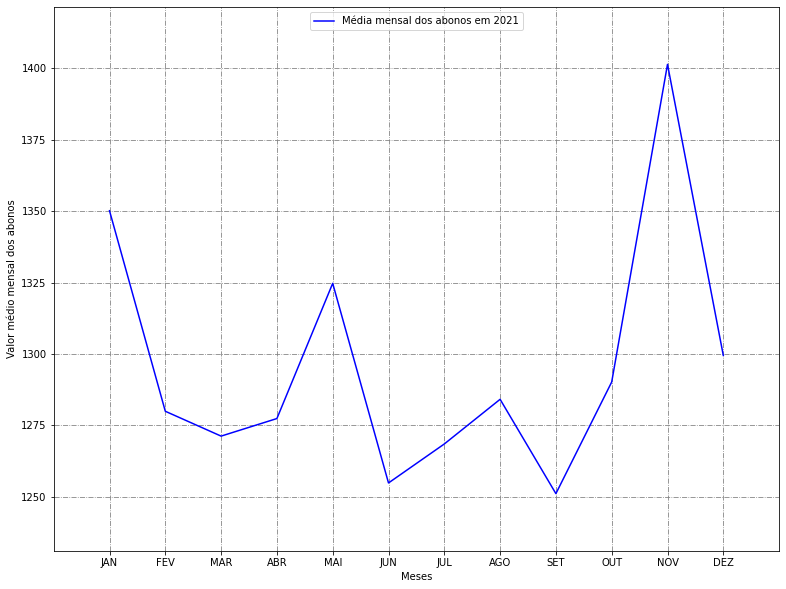

In [17]:
#Média dos anos anteriores a 2021
def media(df_ab, index):
    meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    meses_medias = list(df_ab.groupby('Mes').VAL.mean())

    fig = plt.figure(figsize=(13, 10))
    plt.plot(meses, meses_medias, color = 'blue')
    plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
    plt.xlim(-1, 12)

    plt.rc('grid', linestyle="-.", color='gray')
    plt.grid(True)

    plt.xlabel('Meses')
    plt.ylabel('Valor médio mensal dos abonos')
    plt.legend(['Média mensal dos abonos em '+anos_ab[index]], loc=9)
    plt.show()
    fig_name = 'valor médio mensal dos abonos em {}'.format(anos_ab[i])
    fig.savefig(fig_name+'.png', format='png', dpi=100)
    return meses_medias
medias = []
for i in range(len(df_abonos)):
    medias.append(media(df_abonos[i], i))
#armazenando a média mensal de cada ano

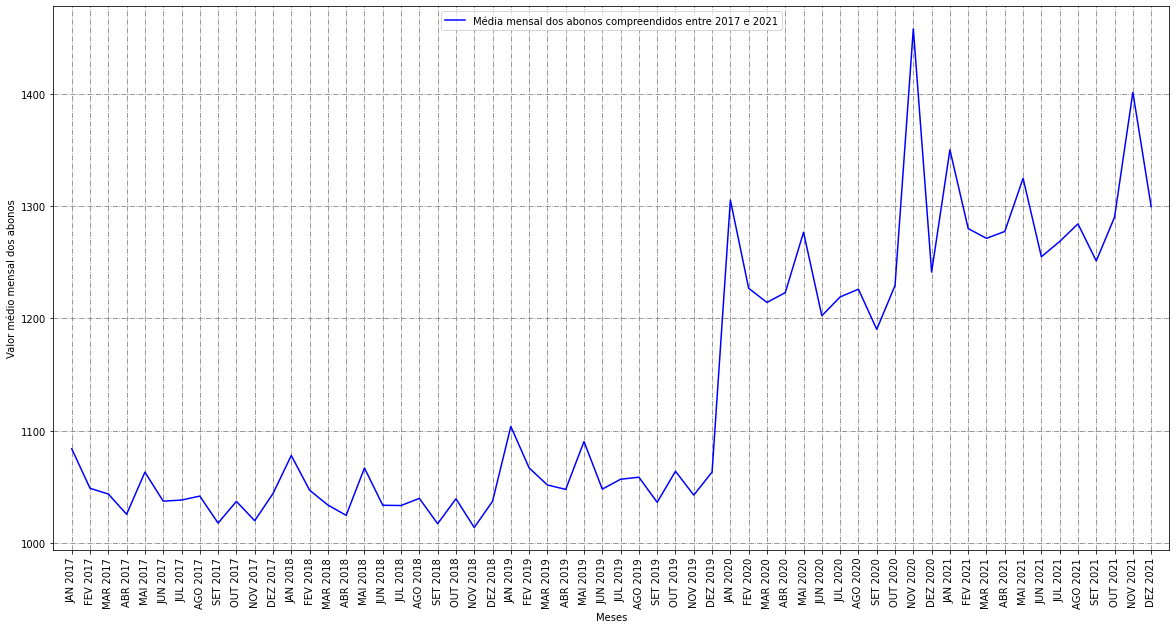

In [18]:
#Valor mensal de abonos em 2021
meses = []
for year in anos_ab:
    months_table = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    for month in months_table:
        meses.append(f'{month} {year}')

meses_medias = []
for df_abono in df_abonos:
    meses_medias += list(df_abono.groupby('Mes').VAL.mean())

fig = plt.figure(figsize=(20, 10))
plt.plot(meses, meses_medias, color = 'blue')
plt.xticks(rotation=90)
plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
plt.xlim(-1, len(meses))

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Valor médio mensal dos abonos')
plt.legend(['Média mensal dos abonos compreendidos entre 2017 e 2021'], loc=9)
plt.show()

fig.savefig('valor médio mensal dos abonos em 2021.png', format='png', dpi=100)

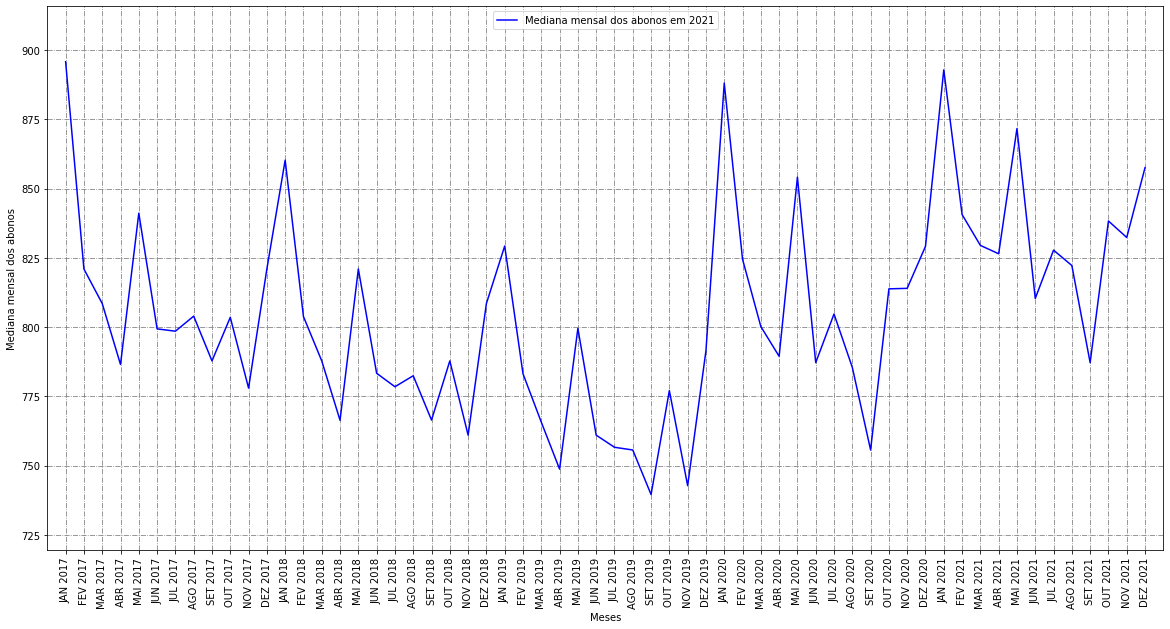

In [19]:


#Mediana mensal dos abonos em 2021
medianas = []
for df_abono in df_abonos:
    medianas += list(df_abono.groupby('Mes').VAL.median())

fig = plt.figure(figsize=(20, 10))
plt.plot(meses, medianas, color = 'blue')
plt.ylim(min(medianas) - 20, max(medianas) + 20)
plt.xticks(rotation=90)
plt.xlim(-1, len(meses))

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Mediana mensal dos abonos')
plt.legend(['Mediana mensal dos abonos em 2021'], loc=9)
plt.show()

fig.savefig('Mediana mensal dos abonos em 2021.png', format='png', dpi=100)

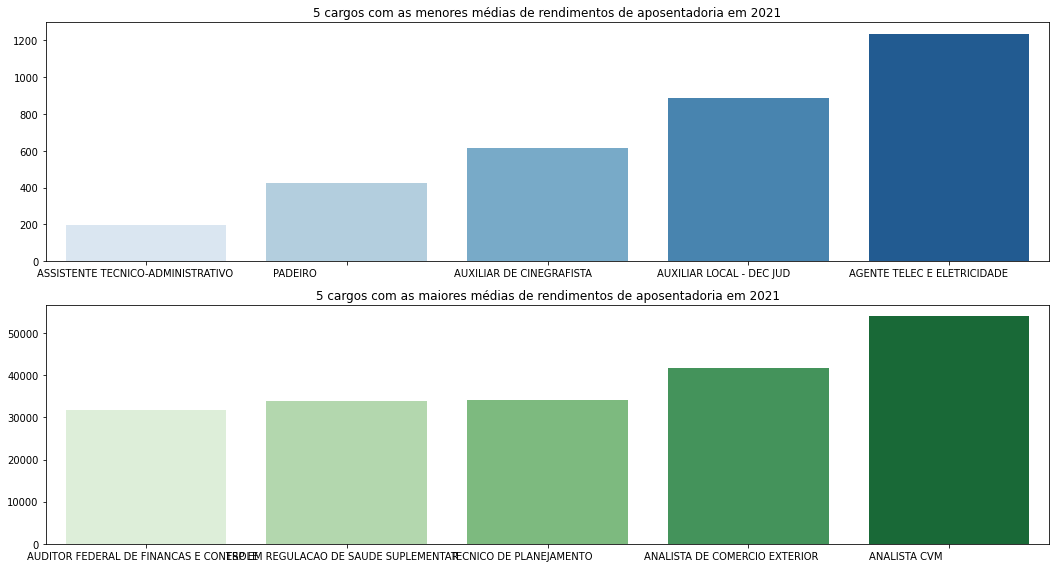

In [20]:
#Redimentos aposentadoria de acordo com o cargo
redimentos = pd.DataFrame(df_aposentados[0].groupby('Cargo').Rendimento_liq.mean().sort_values())
redimentos = redimentos.reset_index()

menores_rend = redimentos.iloc[0:5]
maiores_rend = redimentos.tail(5)

fig, ax = plt.subplots(2, figsize=(15,8))

x1 = list(menores_rend['Cargo'])
y1 = list(menores_rend['Rendimento_liq'])

sns.barplot(ax=ax[0], x=x1, y=y1, palette="Blues")
ax[0].set_title("5 cargos com as menores médias de rendimentos de aposentadoria em 2021")

x2 = list(maiores_rend['Cargo'])
y2 = list(maiores_rend['Rendimento_liq'])
sns.barplot(ax=ax[1], x=x2, y=y2, palette="Greens")
ax[1].set_title("5 cargos com as maiores médias de rendimentos de aposentadoria em 2021")

fig.tight_layout()
plt.savefig('Médias de rendimento por cargo')

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


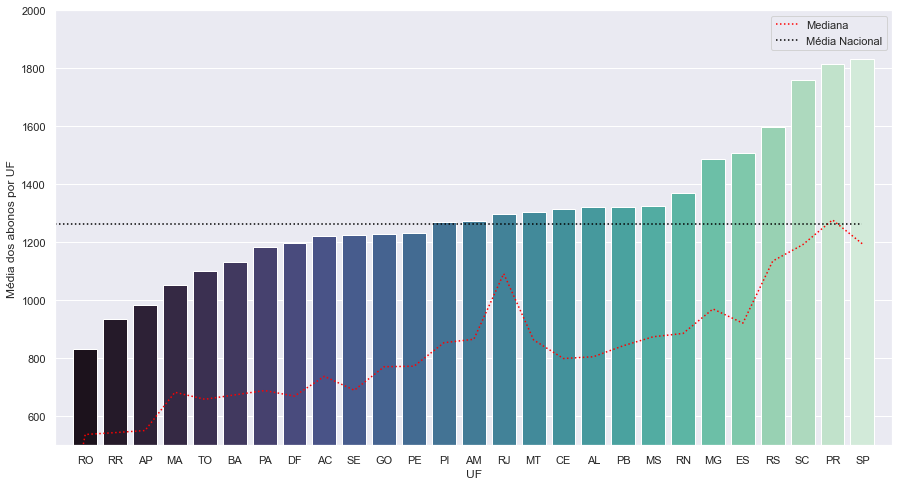

In [21]:
#Média e mediana de abonos por UF 

#Definindo a media e mediana
uf_m = pd.DataFrame(df_abono.groupby('UF').VAL.mean().sort_values())
uf_m['mediana'] = df_abono.groupby('UF').VAL.median().sort_values() 
uf_m['media'] = uf_m['VAL']
uf_m.reset_index(inplace=True)

uf_m.drop('VAL', axis=1 ,inplace=True)
uf_m.sort_values('UF')

media_nacional = uf_m['media'].mean()

#Definindo os eixos do gráfico
x_uf = list(uf_m['UF'])
y_mediana = list(uf_m['mediana'])
y_media = list(uf_m['media'])

#Construindo o gráfico
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(15,8))
sns.barplot(x_uf, y_media, palette="mako")
sns.lineplot(x=x_uf, y=y_mediana, linestyle=":",color="red", label='Mediana')
sns.lineplot(x=x_uf, y=media_nacional, linestyle=":",color="black", label='Média Nacional')
plt.ylim(500,2000)
plt.xlim(0, 28)
plt.xlabel('UF')
plt.ylabel('Média dos abonos por UF')
plt.show()

fig.tight_layout()
fig.savefig('Valor médio mensal dos abonos por estado.png', format='png',dpi=100)

In [22]:
#Lendo aposentadorias de anos anteriores a 2021
cols = ['Nome','CPF','Matrícula do Servidor','Nome do órgão','Sigla do órgão','Código do órgão superior','Cargo', 'Classe', 'Padrão', 
        'Referência', 'Nível' ,'Tipo de Aposentadoria','Fundamentação da inatividade','Nome Diploma Legal',
        'Data publicação do Diploma Legal','Ocorrência de ingresso no serviço público','Data de ocorrência de ingresso no serviço público ','Rendimento_liq']
anos_ap = ['2019', '2020', '2021']
df_aposentados = []
for i in anos_ap:
    dir =  r'./dataset/Datasets/Aposentados{}'.format(i)
    files = glob.glob(dir + "/*.csv")
    df = []
    dfs = []
    for j in range(len(files)):
        df.append(pd.read_csv(files[j], encoding='Latin1',sep=';', names=cols, index_col=False, on_bad_lines = 'skip'))
    dfs = pd.concat(df)
    # dfs = dfs[dfs['Nome'] != 'Nome']
    df_aposentados.append(dfs)

Decomposição de tendências de 2017 a 2021


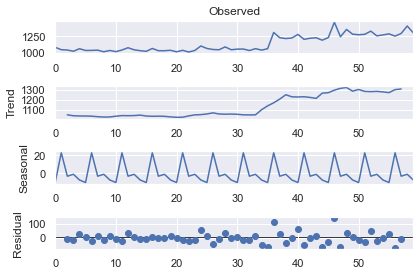

In [23]:
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose

medias_conc = list(itertools.chain.from_iterable(medias))

decompose = seasonal_decompose(medias_conc,model='additive', period=5)
decompose.plot()
print("Decomposição de tendências de 2017 a 2021")
plt.show()

C:\Users\localhost\AppData\Local\Temp\ipykernel_12732\2498865559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Media_mensal']
C:\Users\localhost\AppData\Local\Temp\ipykernel_12732\2498865559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Media_mensal']


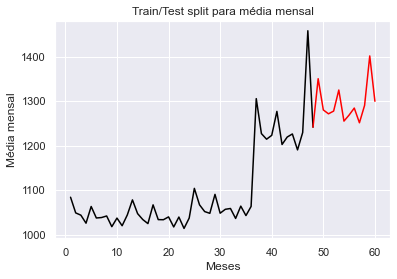

In [24]:
#Predição

months = list(range(1,61))
df_medias = pd.DataFrame(medias_conc, index = months, columns = ['Media_mensal'])
df_medias['Mes'] = df_medias.index
train = df_medias[df_medias['Mes'] <=  48]
train['train'] = train['Media_mensal']
del train['Mes']
del train['Media_mensal']
test = df_medias[df_medias['Mes'] >=  48]
test['test'] = test['Media_mensal']
del test['Mes']
del test['Media_mensal']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split para média mensal")
plt.ylabel("Média mensal")
plt.xlabel('Meses')
sns.set()
plt.show()

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from itertools import product
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
y = train['train']

c:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python\Python39\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af

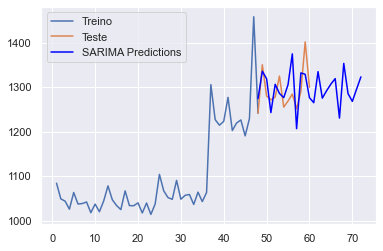

In [103]:
SARIMAXmodel = SARIMAX(y, order = (12, 0, 1), seasonal_order=(0,0,0,2))
SARIMAXmodel = SARIMAXmodel.fit(dis=-1)

def sarima_forecast(size):
    y_pred = SARIMAXmodel.get_forecast(size)
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    
    y_pred_df.index = [i for i in range(y_pred_df.index[0], y_pred_df.index[-1] + 1)] # test.index
    y_pred_out = y_pred_df["Predictions"] 
    return y_pred_out

y_pred_out = sarima_forecast(len(test.index) + 12)

plt.clf()
plt.plot(train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()